# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

### Обзор данных

In [ ]:
import pandas as pd

In [ ]:
try:
    data = pd.read_csv('/Users/pashc/Downloads/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из этого, можно сделать вывод о том, что пропущенные значения имеют следующие столбцы:

ceiling_height

floors_total               
living_area              
is_apartment            
kitchen_area            
balcony                 
locality_name              
airports_nearest         
cityCenters_nearest      
parks_around3000         
parks_nearest           
ponds_around3000         
ponds_nearest           
days_exposition

In [ ]:
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

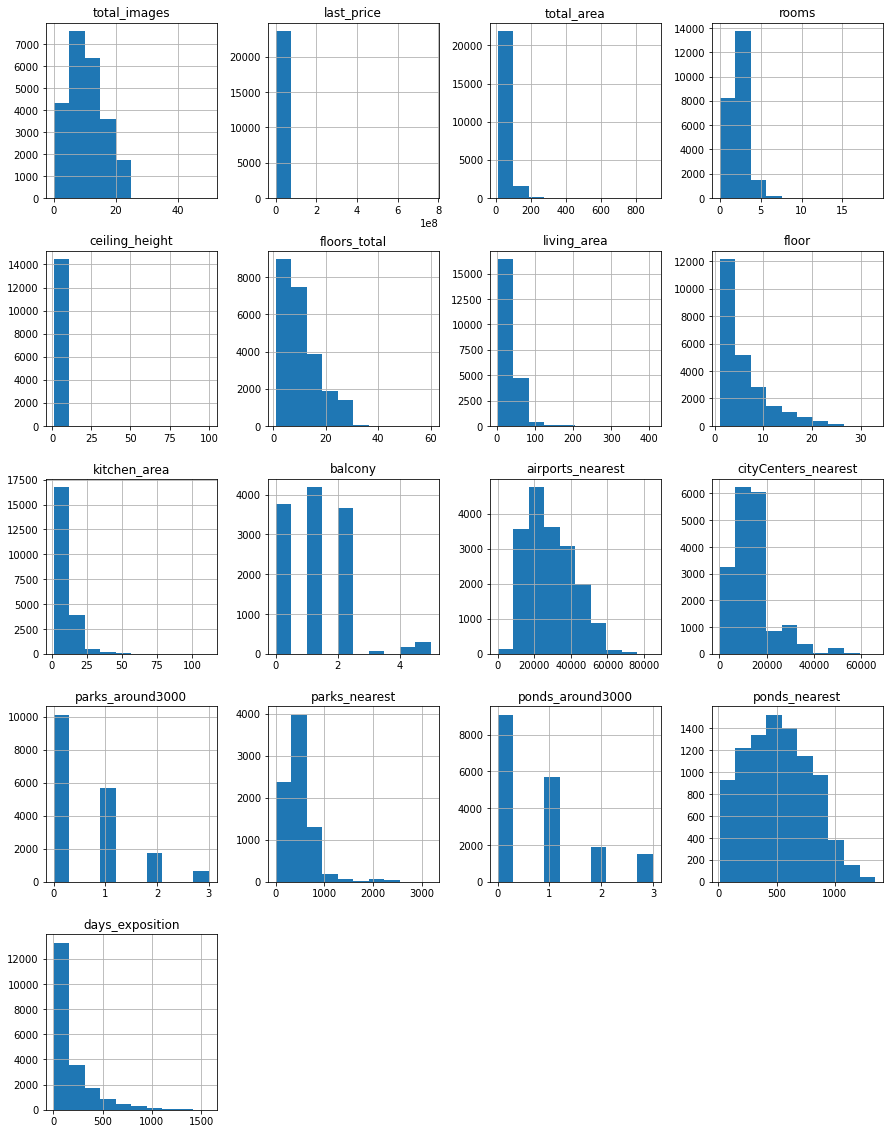

In [ ]:
data.hist(figsize=(15, 20))

**Вывод**

В данных были обнаружены пропуски и неверные типы данных. Таким образом, необходимо рассмтотреть пропуски в следующих столбцах:
    
- ceiling_height
- floors_total               
- living_area              
- is_apartment            
- kitchen_area            
- balcony                 
- locality_name              
- airports_nearest         
- cityCenters_nearest      
- parks_around3000         
- parks_nearest           
- ponds_around3000         
- ponds_nearest           
- days_exposition

Также необходимо исправить типа данных в следующих столбцах:
- first_day_exposition на datetime
- floors_total на int
- is_apartment на bool
- parks_around3000 на int
- days_exposition на int

### Предобработка данных

Взаимосвязь с другими данными не была выявленна, поэтому можно предположить, что были допущены ошибки при их заполнении.

Эти данные лучше всего заменить на медианное значение, чтобы это не помешало расчетам

In [ ]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True)
data['ceiling_height'].isna().sum()

0

In [ ]:
data['living_area'].fillna(data['living_area'].median(), inplace = True)
data['living_area'].isna().sum()

0

In [ ]:
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace = True)
data['kitchen_area'].isna().sum()

0

Такие данные бесполезно заменять, это может увеличить количество выбросов, поэтому их лучше удалить

In [ ]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

In [ ]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].isna().sum()

0

Данные о балконах скорее всего были ошибочно заполненны, можно предположить , что в этой недвижимости просто отсутствуют балконы.

In [ ]:
data['balcony'] = data['balcony'].fillna(value = 0).astype('int') #заменяем тип данных
data['balcony'].isna().sum()

0

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value = False)
data['is_apartment'].isna().sum()

0

Здесь тоже можно предположить, что данные были ошибочно заполнены.Более того, небходимо заменить тип данных на иннтеджер

In [ ]:
import numpy as np
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

<div class="alert alert-info">
<b>Изменено</b>

Данные взаимосвязаны между собой, но мы можем предположить, что в этом радиусе нет ни парков ни водоемов

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0).astype('int')#заменяем тип данных
data['parks_around3000'].isna().sum()

0

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0).astype('int')#заменяем тип данных
data['ponds_around3000'].isna().sum()

0

Менять и удалать  эти данные мы не будем: cityCenters_nearest, airports_nearest, parks_nearest, ponds_nearest. Они взаимосвязаны между собой, но просто удалить их нельзя.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Замена данных**

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [ ]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.00,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


In [ ]:
print(data.duplicated().sum())

0


Явные дубликаты не найдены

In [ ]:
data['locality_name'] = data['locality_name'].replace('посёлок|деревня|коттеджный|село|городского типа', '', regex = True)

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

В данном столбце есть некоторые аномальные значения, которые должны разделяться точкой(например, 24, 25) и равны 1 метру.

In [ ]:
data = data[(data['ceiling_height'] < 10) & (data['ceiling_height'] != 1)]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.

In [ ]:
#Изменим большие цифры на миллионы
data['last_price'] = data['last_price']/1000000

In [ ]:
#изучим данные  о количестве комнат
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [ ]:
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17.500,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,<NA>
866,5,25.000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418
5358,20,65.000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
9688,8,33.000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813
14498,6,32.250,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114
18848,6,28.500,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365
19540,8,420.000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106
20829,6,28.659,245.4,2016-03-31,14,2.65,4,168.3,2,False,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95


In [ ]:
#удаление аномальный значений больше 200 кв.метров
data = data[data['total_area'] < 200.00]

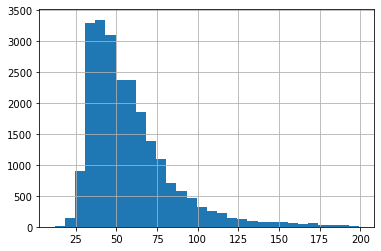

In [ ]:
#проверка аномальных данных
data['total_area'].hist(bins=30);

Аномальными значениями в данном стобце можно счить те данные, которые выше 200 кв.метров, поскольку на графике видно, что их практически нет

In [ ]:
#удаление данных о количесве комнат больше 10
data = data[data['rooms'] < 10.00]

<AxesSubplot:>

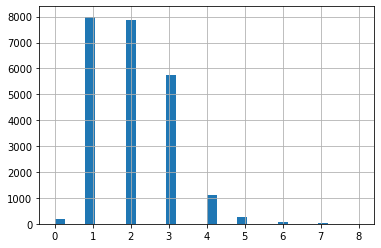

In [ ]:
#проверка аномальных данных
data['rooms'].hist(bins=30)

Аномальными данными в этом случае могут считаться те, количество комнат которых превышает 10, поскольку их практически нет

<AxesSubplot:>

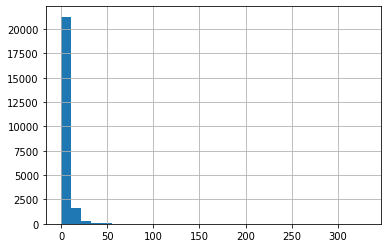

In [ ]:
#проверка аномальных данных
data['last_price'].hist(bins=30)

<AxesSubplot:>

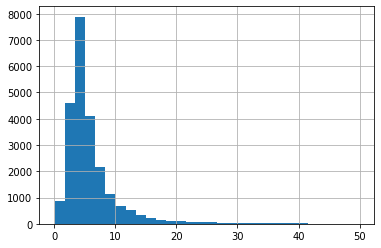

In [ ]:
#удаление данных о стоимости меньше 50 миллионов
data = data[data['last_price'] < 50.00]
data['last_price'].hist(bins=30)

Аномальными значениями является стоимость меньше 50 миллионов, поскольку их совесм не видно на рафике - значит таких значений очень мало

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
# цена квадратного метра
data['per_square_meter'] = data['last_price'] / data['total_area']
# день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
# функция для создания типа этажа в квартире
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [ ]:
data['floor_type'] = data.apply(floor_type, axis = 1)

In [ ]:
#функция расстояния до центра города в километрах
def distance_to_the_center(row):
    if row['cityCenters_nearest'] != 'NaN':
        return row['cityCenters_nearest'] / 1000


In [ ]:
data['cityCenters_nearest_km'] = data.apply(distance_to_the_center, axis = 1)

In [ ]:
data['cityCenters_nearest_km'] = np.floor(pd.to_numeric(data['cityCenters_nearest_km'], errors='coerce')).astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23252 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23252 non-null  int64         
 1   last_price              23252 non-null  float64       
 2   total_area              23252 non-null  float64       
 3   first_day_exposition    23252 non-null  datetime64[ns]
 4   rooms                   23252 non-null  int64         
 5   ceiling_height          23252 non-null  float64       
 6   floors_total            23252 non-null  int64         
 7   living_area             23252 non-null  float64       
 8   floor                   23252 non-null  int64         
 9   is_apartment            23252 non-null  bool          
 10  studio                  23252 non-null  bool          
 11  open_plan               23252 non-null  bool          
 12  kitchen_area            23252 non-null  float6

### Проведите исследовательский анализ данных

In [ ]:
import matplotlib.pyplot as plt

**Изучение общей площади**

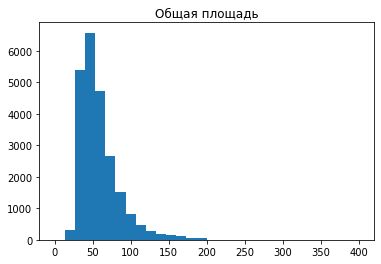

count    23252.000000
mean        57.891917
std         26.009582
min         12.000000
25%         40.000000
50%         51.550000
75%         68.425000
max        199.200000
Name: total_area, dtype: float64

In [ ]:
plt.hist(data['total_area'], bins=30, range = (0, 400))
plt.title('Общая площадь')
plt.show()
data['total_area'].describe()

In [ ]:
# топ 5 квартир с наименьшей площадью
data['total_area'].sort_values().head()

19904    12.0
19546    13.0
19807    13.0
17961    13.0
19558    13.2
Name: total_area, dtype: float64

In [ ]:
# топ 5 квартир больших по площаде
data['total_area'].sort_values(ascending=False).head()

15079    199.2
6509     198.9
16656    198.1
10315    198.0
11438    198.0
Name: total_area, dtype: float64

Большинство квартир площадью 50 кв.м, наименьшая площадь составляет 12 кв.м., а наибольшая 900 кв.м

**Изучение жилой площади**

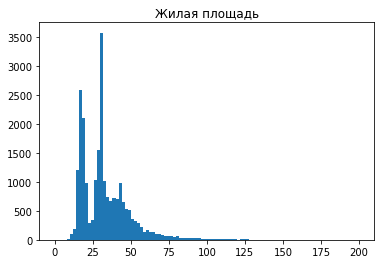

count    23252.000000
mean        32.878027
std         16.490793
min          2.000000
25%         19.000000
50%         30.000000
75%         40.800000
max        164.700000
Name: living_area, dtype: float64

In [ ]:
plt.hist(data['living_area'], bins=100, range = (0, 200))
plt.title('Жилая площадь')
plt.show()
data['living_area'].describe()

In [ ]:
# топ 5 квартир по меньшей общей площади
data['living_area'].sort_values().head()

21758    2.0
13915    2.0
3242     3.0
17582    5.0
21943    5.4
Name: living_area, dtype: float64

In [ ]:
# топ 5 квартир по большей общей площади
data['living_area'].sort_values(ascending=False).head()

21676    164.7
22904    159.6
9392     150.8
11800    147.2
11438    147.0
Name: living_area, dtype: float64

Жилая площадь в основном не превышает 30 кв.м, наименьшей жилой площадью квартир является 2 кв.м, а наибольшей 409.7 кв.м

**Изучение площади кухни**

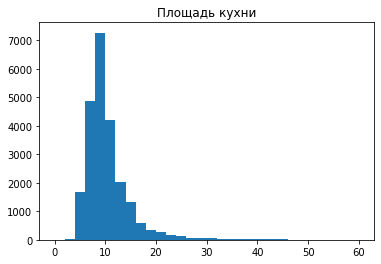

count    23252.000000
mean        10.216512
std          4.950153
min          1.300000
25%          7.300000
50%          9.100000
75%         11.300000
max         75.000000
Name: kitchen_area, dtype: float64

In [ ]:
plt.hist(data['kitchen_area'], bins=30, range = (0, 60))
plt.title('Площадь кухни')
plt.show()
data['kitchen_area'].describe()

In [ ]:
# топ 5 квартир по меньшей площади кухни
data['kitchen_area'].sort_values().head()

20217    1.3
9138     2.0
6262     2.0
19642    2.0
16367    2.0
Name: kitchen_area, dtype: float64

In [ ]:
# топ 5 квартир по большей площади кухни
data['kitchen_area'].sort_values(ascending=False).head()

14644    75.0
18447    65.0
22980    65.0
19499    64.0
15780    64.0
Name: kitchen_area, dtype: float64

Общая площадь кухни не превышает 10 кв. м, наибольшей площадью кухни является 112 кв. м, а наименьшей 1,2 кв.м

**Изучение цены объекта**

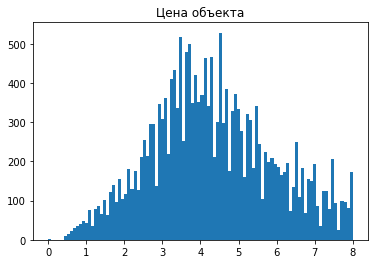

count    23252.000000
mean         5.848714
std          4.575786
min          0.012190
25%          3.400000
50%          4.600000
75%          6.650000
max         49.900000
Name: last_price, dtype: float64

In [ ]:
plt.hist(data['last_price'], bins=100, range = (0, 8))
plt.title('Цена объекта')
plt.show()
data['last_price'].describe()

In [ ]:
# топ 5 квартир по меньшей цене
data['last_price'].sort_values().head()

8793     0.01219
14911    0.43000
17456    0.43000
16274    0.44000
9581     0.45000
Name: last_price, dtype: float64

In [ ]:
# топ 5 квартир по большей цене
data['last_price'].sort_values(ascending=False).head()

13311    49.900
9474     49.900
10001    49.500
18770    49.000
17783    48.763
Name: last_price, dtype: float64

Основная цена квартир располагается в диапозоне от 3 млн до 5 млн. Наибольшая стоимость 763000000, а наименьшая 12190

**Изучение количества комнат**

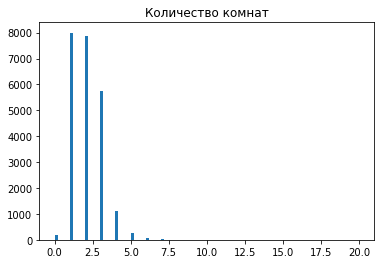

count    23252.000000
mean         2.030363
std          0.989962
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [ ]:
plt.hist(data['rooms'], bins=100, range = (0, 20))
plt.title('Количество комнат')
plt.show()
data['rooms'].describe()

In [ ]:
# топ 5 квартир с большим количеством комнат
data['rooms'].sort_values(ascending=False).head()

8758     8
4435     8
2261     7
17350    7
855      7
Name: rooms, dtype: int64

больше всего квартир с 1, 2 и 3 комнатами. Квартирой с наибольшим числом комнат равна 19.

**Изучение высоты потолков**

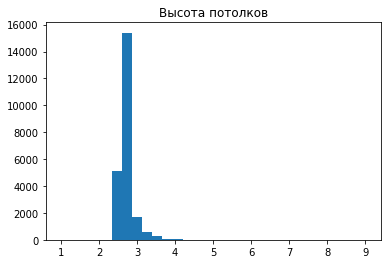

count    23252.000000
mean         2.692439
std          0.220310
min          1.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

In [ ]:
plt.hist(data['ceiling_height'], bins=30, range = (1, 9))
plt.title('Высота потолков')
plt.show()
data['ceiling_height'].describe()

In [ ]:
# топ 5 квартир с меньшей высотой комнат
data['ceiling_height'].sort_values().head()

5712     1.20
16934    1.75
19329    2.00
5850     2.00
4212     2.00
Name: ceiling_height, dtype: float64

In [ ]:
# топ 5 квартир с большей высотой комнат
data['ceiling_height'].sort_values(ascending=False).head()

5863     8.3
3474     8.0
17442    8.0
15743    8.0
21227    5.8
Name: ceiling_height, dtype: float64

Больше всего квартир с высотой потолков от 2 до 4 метров. Наибольшей высотой потолков является 8,3 м, а наименьшей 1,2.

**Изучение этажей квартиры**

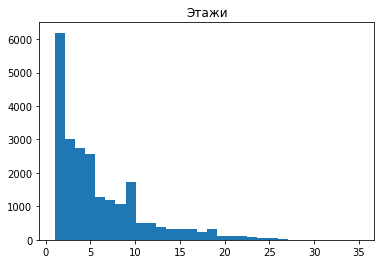

count    23252.000000
mean         5.889558
std          4.884298
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [ ]:
plt.hist(data['floor'], bins=30, range = (1, 35))
plt.title('Этажи')
plt.show()
data['floor'].describe()

In [ ]:
# топ 5 квартир на высоком этаже
data['floor'].sort_values(ascending=False).head()

18218    33
11575    32
18629    31
1917     30
11079    29
Name: floor, dtype: int64

 Квартиры в основном находятся на 1 - 5 этаже. Наибольший этаж - 33

**Изучение типов этажей квартир**

In [ ]:
data.groupby('floor_type').sum()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km
floor_type,,,,,,,,,,,,,,,,,,,,,
другой,170401,104658.492083,994154.61,34076,46062.26,206083,556769.191510,110707,29,124,...,7650,2881161.0,10033,3502778.0,2595809,1741.681183,43857,109889,34531583,183531
первый,26746,13186.852827,159022.83,6154,7750.10,19952,94399.230000,2891,6,15,...,1372,446087.0,1535,508447.0,493159,234.937792,7396,18178,5832110,29973
последний,31827,18148.956625,192925.42,6980,8792.24,23346,113311.460002,23346,9,7,...,1630,526064.0,1895,586414.0,524684,289.161195,8415,20785,6544323,31927


Больше всего квартир находится на другом этаже, а также на последнем.

**Изучение общего количества этажей**

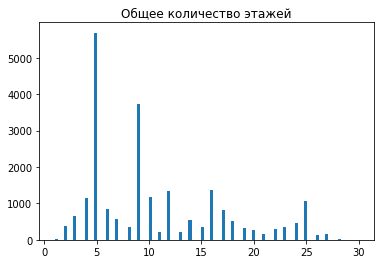

count    23252.000000
mean        10.725142
std          6.606705
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
plt.hist(data['floors_total'], bins=100, range = (1, 30))
plt.title('Общее количество этажей')
plt.show()
data['floors_total'].describe()

In [ ]:
# топ 5 квартир с большим общим количеством этажей
data['floors_total'].sort_values(ascending=False).head()

2253     60
16731    52
16934    37
11079    36
397      36
Name: floors_total, dtype: int64

Большее количество этажей равняется 5. Макисимальное количество общих этажей - 60

**Изучение расстояния до центра города в метрах**

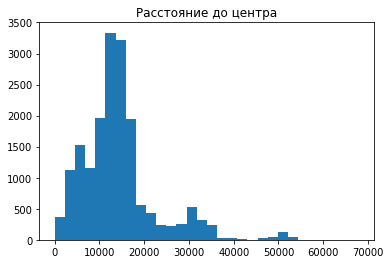

count    17765.000000
mean     14311.733352
std       8592.916950
min        181.000000
25%       9488.000000
50%      13170.000000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
plt.hist(data['cityCenters_nearest'], bins=30, range = (1, 68000))
plt.title('Расстояние до центра')
plt.show()
data['cityCenters_nearest'].describe()

In [ ]:
# топ 5 квартир с меньшим расстоянием
data['cityCenters_nearest'].sort_values().head()

13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
Name: cityCenters_nearest, dtype: float64

In [ ]:
# топ 5 квартир с большим расстоянием
data['cityCenters_nearest'].sort_values(ascending=False).head()

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
Name: cityCenters_nearest, dtype: float64

Больше всего квартир с удаленность от 10000 до 20000 метров. Большее расстояние 65968 метров, а наименьшее 181 метр.

**Изучение расстояния до ближайшего аэропорта**

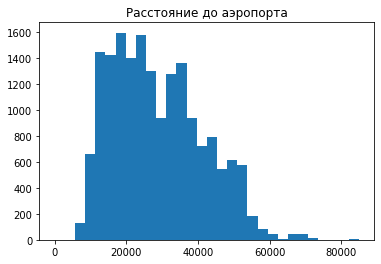

count    17745.000000
mean     28829.776106
std      12695.327638
min          0.000000
25%      18488.000000
50%      26819.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [ ]:
plt.hist(data['airports_nearest'], bins=30, range = (0, 85000))
plt.title('Расстояние до аэропорта')
plt.show()
data['airports_nearest'].describe()

In [ ]:
# топ 5 квартир с меньшим расстоянием
data['airports_nearest'].sort_values().head()

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64

In [ ]:
# топ 5 квартир с большим расстоянием
data['airports_nearest'].sort_values(ascending=False).head()

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
Name: airports_nearest, dtype: float64

Больше всего квартир находится на рассотянии от аэропорта от 20000 до 30000 метров. Самая удаленная квартира от аэропорта находится на расстоянии более 80000 метров, а самая близжайшая на 6450 метров

**Изучение расстояния до ближайшего парка**

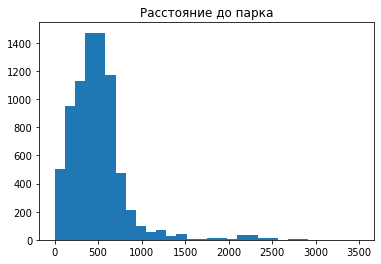

count    7821.000000
mean      492.687892
std       342.421154
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
plt.hist(data['parks_nearest'], bins=30, range = (1, 3500))
plt.title('Расстояние до парка')
plt.show()
data['parks_nearest'].describe()

In [ ]:
# топ 5 квартир с наименьшим расстоянием
data['parks_nearest'].sort_values().head()

14624    1.0
11949    3.0
22941    4.0
9344     7.0
2527     9.0
Name: parks_nearest, dtype: float64

In [ ]:
# топ 5 квартир с большим расстоянием
data['parks_nearest'].sort_values(ascending=False).head()

10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

Больше всего квартир находдится на расстоянии 500 метров. Самая удаленная квартира на расстоянии 1 метра, а самая удаленная на расстоянии 2984 метра

**Изучение деня и месяца публикации объявления**

<AxesSubplot:xlabel='weekday_exposition', ylabel='month_exposition'>

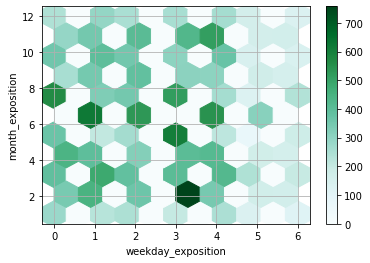

In [ ]:
data.plot(x = 'weekday_exposition', y = 'month_exposition', kind='hexbin', gridsize = 10, sharex=False, grid=True)

Больше всего в публиковались в четверг в феврале месяце

**Как быстро продавались квартиры**

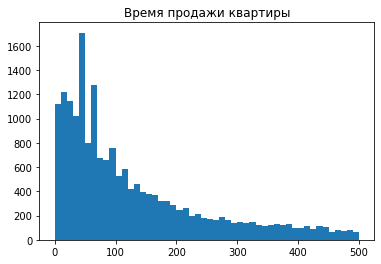

count    20154.000000
mean       179.301975
std        218.152018
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
hist = data[data['days_exposition'] !='NaN']
plt.hist(hist['days_exposition'], bins=50, range = (0, 500))
plt.title('Время продажи квартиры')
plt.show()
hist['days_exposition'].describe()

Больше всего квартир продавались в течении 100 дней.Так же необходимо рассмотреть первый квантиль, который равен 45, до этого времени продажи можно назвать быстрыми, а самыми долгими от 230 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта**

<AxesSubplot:xlabel='total_area'>

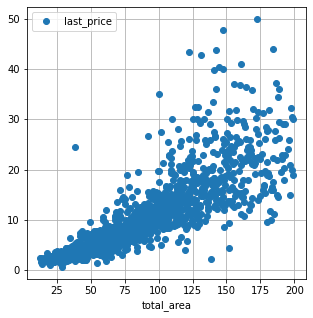

In [ ]:
# влияние площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
# кореляция
data.pivot_table(index='floor', values=['total_area', 'last_price']).corr()

,last_price,total_area
last_price,1.00000,0.88236
total_area,0.88236,1.00000


Благодаря диаграмме рассеивания и корреляции Пирсона, мы можем утверждать, что стоимость на прямую зависит от площади. То есть чем больше площадь - тем выше стоимость квартиры

<AxesSubplot:xlabel='rooms'>

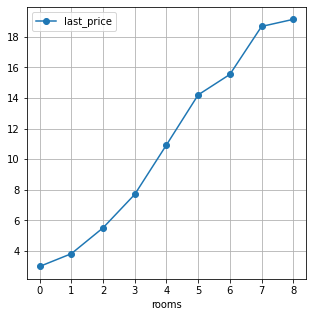

In [ ]:
# влияние числа комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

In [ ]:
data.pivot_table(index='floor', values=['rooms', 'last_price']).corr()

,last_price,rooms
last_price,1.000000,0.579978
rooms,0.579978,1.000000


Рассмотрев диаграмму и значение корреляции можн говорить о том, что присутсвует некая взаимосвязь между числом комнат и ценой, но не такая сильная как у площади.

<AxesSubplot:xlabel='floor_type'>

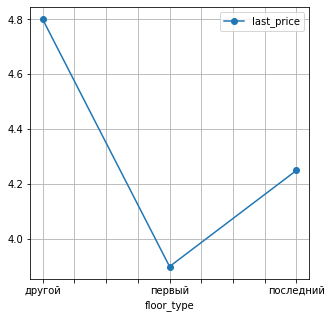

In [ ]:
# влияние этажа
data.pivot_table(index = 'floor_type', values ='last_price', aggfunc = 'median').plot(grid = True, style = 'o-', figsize = (5, 5))

Здесь достаточно очевидно без дополнительной сводной таблицы, что дешевле всего  квартиры на первом этаже, чуть дороже - квартиры на последнем, самая высокая цена у картир на других этажах

<AxesSubplot:xlabel='cityCenters_nearest'>

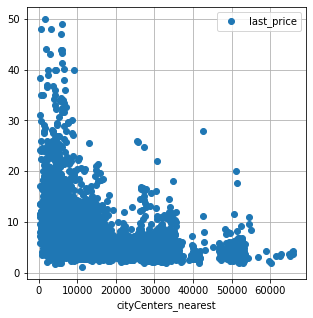

In [ ]:
# влияние удаленности от центра
data.pivot_table(index ='cityCenters_nearest', values ='last_price').plot(grid = True, style = 'o', figsize = (5, 5))

In [ ]:
data.pivot_table(index = 'floor', values = ['cityCenters_nearest', 'last_price']).corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,0.488407
last_price,0.488407,1.000000


В данном случае нельзя сказать, что связь между ценой и удаленностей от центра существует, поскольку корреляция близка к нулю

In [ ]:
# влияние удаленности от парка

<AxesSubplot:xlabel='parks_nearest'>

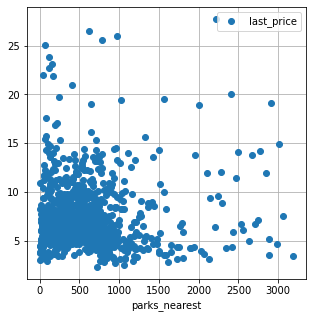

In [ ]:
data.pivot_table(index = 'parks_nearest', values = 'last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
data.pivot_table(index = 'floor', values = ['parks_nearest', 'last_price']).corr()

,last_price,parks_nearest
last_price,1.0000,-0.2067
parks_nearest,-0.2067,1.0000


Также не обнаружена взаимосвязь цены от удаленности парка

In [ ]:
# влияние удаленности от аэропорта

<AxesSubplot:xlabel='airports_nearest'>

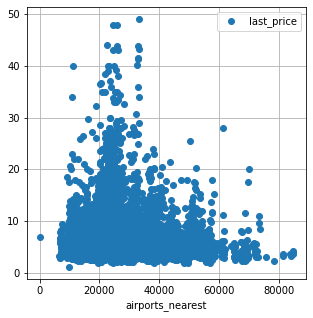

In [ ]:
data.pivot_table(index ='airports_nearest', values = 'last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
data.pivot_table(index ='floor', values = ['airports_nearest', 'last_price']).corr()

,airports_nearest,last_price
airports_nearest,1.000000,-0.667722
last_price,-0.667722,1.000000


Здесь обратная взаимосвязь, то есть стоимость квартиры меньше, чем ближе она к аэропорту, но такая зависимость слабая

In [ ]:
#влияние от удаленности водоема

<AxesSubplot:xlabel='ponds_nearest'>

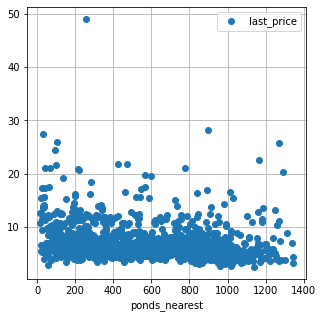

In [ ]:
data.pivot_table(index ='ponds_nearest', values = 'last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
data.pivot_table(index ='floor', values = ['ponds_nearest', 'last_price']).corr()

,last_price,ponds_nearest
last_price,1.000000,-0.516768
ponds_nearest,-0.516768,1.000000


Особой взаимосвязи между удаленостью от водоемов нет

In [ ]:
#влияние на площадь кухни

<AxesSubplot:xlabel='kitchen_area'>

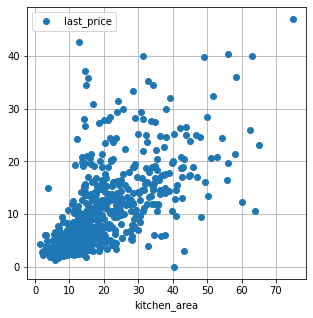

In [ ]:
data.pivot_table(index ='kitchen_area', values = 'last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
data.pivot_table(index ='floor', values = ['kitchen_area', 'last_price']).corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.400074
last_price,0.400074,1.000000


Взаимосвязь между площадью кухни есть, но слабая, можно утвержать о том, что больше играет роль общая площадь - где чаще всего больше и площадь кухни

<AxesSubplot:xlabel='living_area'>

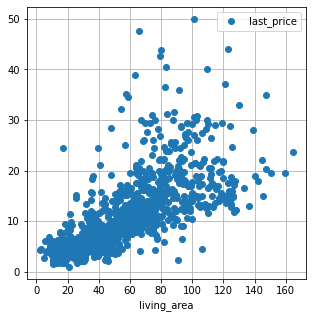

In [ ]:
#влияние жилой площади
data.pivot_table(index ='living_area', values = 'last_price').plot(grid=True, style='o', figsize=(5, 5))

In [ ]:
data.pivot_table(index ='floor', values = ['living_area', 'last_price']).corr()

,last_price,living_area
last_price,1.000000,0.731607
living_area,0.731607,1.000000


Зависимость жилой площади от цены имеется, поскольку из кореляции Пирсона видно, что что значение близко к единице

,mean,count,median
weekday_exposition,,,
1,0.098025,4124,0.095422
2,0.097884,3886,0.095392
3,0.097873,4206,0.094895
0,0.097773,3553,0.094504
6,0.096414,1665,0.094444
4,0.096943,3926,0.094418
5,0.095656,1892,0.093311


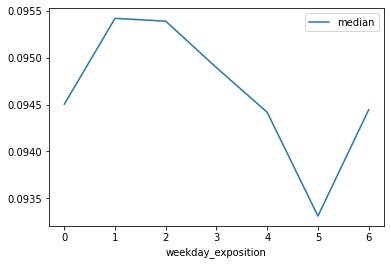

In [ ]:
#влияние недели на цену
week = data.pivot_table(index = 'weekday_exposition', values = 'per_square_meter', aggfunc = ['mean', 'count', 'median'])
week.columns = ['mean', 'count', 'median']
week.plot(y = 'median')
week.sort_values('median', ascending = False)

По субботам - самаяя низкая цена, во вторник - наибольшая цена, которая спадает к выходным. Можно утверждать, что цена зависит от спроса.

,mean,count,median
month_exposition,,,
4,0.099189,2325,0.096203
8,0.098361,1722,0.095801
9,0.098052,1943,0.095513
11,0.098086,2335,0.095465
3,0.097253,2542,0.095161
1,0.098106,1463,0.095000
2,0.097128,2604,0.094944
7,0.096967,1657,0.094805
10,0.096431,2083,0.094103


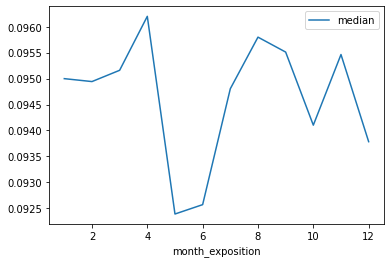

In [ ]:
#влияние месяца на цену
month = data.pivot_table(index = 'month_exposition', values = 'per_square_meter', aggfunc = ['mean', 'count', 'median'])
month.columns = ['mean', 'count', 'median']
month.plot(y = 'median')
month.sort_values('median', ascending = False)

Большая стоимоть в апреле, августе, наименьшая цена в мае и июне. Можно предположить, что во время отпусков, цена на недвижимость повышается.

,mean,count,median
year_exposition,,,
2014,0.119264,132,0.106406
2019,0.105094,2832,0.103109
2018,0.096845,8415,0.095628
2015,0.098664,1124,0.092519
2017,0.095450,8046,0.092317
2016,0.095662,2703,0.091451


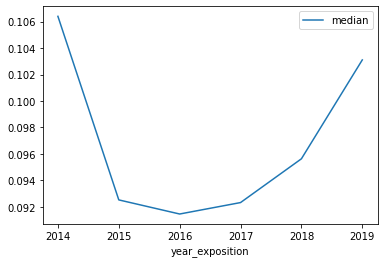

In [ ]:
#влияние года на цену
year = data.pivot_table(index = 'year_exposition', values = 'per_square_meter', aggfunc = ['mean', 'count', 'median'])
year.columns = ['mean', 'count', 'median']
year.plot(y = 'median')
year.sort_values('median', ascending = False)

Наименьшая цена была в 2016 году, позже она рости, здесь влияние на цену может скаладываться из множества факторов

**Средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [ ]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15363
 Мурино              518
 Шушары              439
Всеволожск           398
Пушкин               364
Колпино              337
 Парголово           326
Гатчина              306
 Кудрово             299
Выборг               237
Name: locality_name, dtype: int64

In [ ]:
city_top_10 = data.pivot_table(index = 'locality_name', values = 'per_square_meter', aggfunc=['count', 'median'])
city_top_10.columns = ['count', 'median']
city_top_10 = city_top_10.sort_values('count', ascending = False)
city_top_10.head(10)

,count,median
locality_name,,
Санкт-Петербург,15363,0.104545
Мурино,518,0.085878
Шушары,439,0.076829
Всеволожск,398,0.065789
Пушкин,364,0.099994
Колпино,337,0.074722
Парголово,326,0.091780
Гатчина,306,0.067861
Кудрово,299,0.091860


Исходя из этого, можно сделать выбор о том, что самая большая цена за метр в квадрате - Санкт-Петербург. Наименьшая стоимость за квадратный метр в городах Гатчина, Кудрово, Выборг

**Средняя цена километра в Санкт-Петербурге**

,mean
cityCenters_nearest_km,
0,0.158222
1,0.141728
6,0.140958
5,0.138324
4,0.134520
7,0.132376
27,0.132116
2,0.129468
3,0.121612


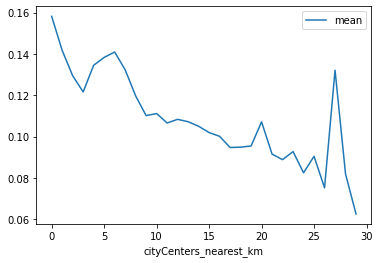

In [ ]:
piter = data.query('locality_name == "Санкт-Петербург"')
piter_km = piter.pivot_table(index = 'cityCenters_nearest_km', values = 'per_square_meter', aggfunc = ['mean'])
piter_km.columns = ['mean']
piter_km.plot(y = 'mean')
piter_km.sort_values('mean', ascending = False)

Можно сделатьл вывод о том, что чем ближе квартира к центру, тем дороже квартира. Исключениея является расстояние от центра от 25 до 30 километров. Возжможно там расспологается элитный загородный комплекс, поэтому цена выше

### Общий вывод


В ходе данного проекта была проведена переработка данных, а именно удаление пропусков из следующих столбцов:
ceiling_height, floors_total, living_area, is_apartment, kitchen_area,balcony, locality_name, cityCenters_nearest, parks_around3000, ponds_around3000, days_exposition. Также были выявлены и исправленны выбивающиеся значения в высоте потолков, такие как 25 м на 2.5. Более того, были исправленны неявные дубликаты: «поселок Рябово» и «поселок городского типа Рябово».

**Добавление в таблицу новых столбцов :**

- день недели публикации объявления - weekday_exposition

- месяц публикации объявления - month_exposition

- год публикации объявления - year_exposition

- цена квадратного метра - per_square_meter

- тип этажа - floor_type

- расстояние до центра в км - cityCenters_nearest_km

**Исследовательский анализ позволил выявить следующие факты**:

- Квартиры продаются в основном общей площадью 50 кв метров, с жилой площадью около 30 кв м. Цена квартир в диапозоне от 3 млн до 5 млн с 1,2,3 комнатами.
Также больше всего квартир находятся на 1 - 5 этаже. Если говорить о удаленности от центра - то в большинстве случаев они находятся на расстоянии 20000 метров.

**Сроки продажи квартиры**

- Также было выяснено как быстро продаются квартиры - в течении 100 дней. Самые быстрые продажи квартир осуществлялись до 45 дней.

**Факторы влияющие на стоимость**

- На стоимость квартиры больше всего влияет общая площадь квартиры, находящихся не на первом и не на последнем этаже. Более того влиятет так же число комнат, но только в том случае, если общая площадь квартиры больше.

- В Питере ярко выраена зависимость цены от удаленности от центра, чем выше цена - тем ближе к центру, за исключением 25 -30 км от центар, там цена на уровне небольшой удаленности от центра